# The Film Ranker
### Dominik Benk, Miroslav Duda

The aim of our project is to provide a script, which will collect data from Česko-Slovenská filmová databáze (ČSFD), and Internet Movie Database (IMDb), with a focus on ratings, visualize these ratings, and rank the scraped films according to criteria specified by the user.

The script scrapes the required data from the individual pages of the films on both databases, and consolidates them into a data frame. According to the conditions specified, a function then prints an ordered list of films. The ordering conditions include the film's duration, rating, and genre. The user may also specify the desired weight of the films' rating on ČSFD compared to IMDb ratings.

We hope that this tool provides a simple way of ranking and comparing films based on their selected attributes. **Documentation of the functions is included in csfd_scraper module.**

### First of all, we need to import all classes from csfd_scraper package

In [14]:
from csfd_scraper import csfd, Ranker, Visualize

## csfd
Class **csfd** contains the following functions:

* FilmLinks():
Uses the built-in ČSFD search feature to collect the links of the individual films, which are then scraped for specific info.

* GetData():
Scrapes the ČSFD links for each film individually, and gathers the scraped data into a Pandas dataframe.

* PrintData(nrows):
Prints the dataframe created through GetDara, with added posters for each film.
The nrows argument specifies how many rows of the dataframe should be printed.

#### ImdbRating
Class **ImdbRating** is used in **csfd** and contains the following functions, which correspond to their ČSFD equivalents:

* getAndParse():

* GetRatingLink():

* GetRating():

### Downloading ČSFD data from first 10 pages together with IMDb ratings

In [11]:
csfdinst = csfd(number_of_pages=10,imdb_rating=True)
csfdinst.GetData()

### Printing 20 observations

In [21]:
csfdinst.PrintData(20)

,poster,cztitle,entitle,year,genre,origin,length (min),director,film_url,CSFD avg rating (%),CSFD num of ratings,IMDB_10star,IMDB_9star,IMDB_8star,IMDB_7star,IMDB_6star,IMDB_5star,IMDB_4star,IMDB_3star,IMDB_2star,IMDB_1star,IMDB avg rating,IMDB_MF_diff,IMDB_US_diff
0,,Forrest Gump,Forrest Gump,1994,"[Drama, Komedie, Romantický]",[USA],142,Robert Zemeckis,https://www.csfd.cz/film/10135-forrest-gump/,95.0,117148,"578,854","513,067","345,162","140,240","47,764","21,485","11,109","7,353","5,706","11,635",8.8,0.1,0.1
1,,Pelíšky,Cosy Dens,1999,"[Komedie, Drama]",[Česko],116,Jan Hřebejk,https://www.csfd.cz/film/4570-pelisky/,91.0,103943,"1,410","1,043",964,525,238,96,44,23,15,59,8.2,-0.4,1.1
2,,Pán prstenů: Společenstvo Prstenu,The Lord of the Rings: The Fellowship of the Ring,2001,"[Fantasy, Dobrodružný, Akční]","[USA, Nový Zéland]",172,Peter Jackson,https://www.csfd.cz/film/4711-pan-prstenu-spolecenstvo-prstenu/,90.0,102407,"595,463","432,423","295,583","124,449","43,697","21,437","10,435","7,871","6,663","26,418",8.8,0.0,0.0
3,,Vykoupení z věznice Shawshank,The Shawshank Redemption,1994,"[Drama, Krimi]",[USA],142,Frank Darabont,https://www.csfd.cz/film/2294-vykoupeni-z-veznice-shawshank/,95.0,102271,"1,208,893","554,503","252,021","81,149","24,538","12,678","6,195","4,479","4,201","33,622",9.3,0.1,-0.1
4,,Zelená míle,The Green Mile,1999,"[Drama, Mysteriózní, Krimi]",[USA],188,Frank Darabont,https://www.csfd.cz/film/2292-zelena-mile/,93.0,100125,"279,477","330,810","274,356","113,445","34,744","13,173","6,296","3,798","2,501","4,926",8.6,-0.2,0.2
5,,Matrix,The Matrix,1999,"[Akční, Sci-Fi]",[USA],136,"Lilly Wachowski, Lana Wachowski",https://www.csfd.cz/film/9499-matrix/,90.0,99585,"479,145","470,994","347,270","153,945","53,540","24,061","12,025","8,303","6,301","15,644",8.7,0.5,0.1
6,,Pulp Fiction: Historky z podsvětí,Pulp Fiction,1994,"[Krimi, Drama]",[USA],154,Quentin Tarantino,https://www.csfd.cz/film/8852-pulp-fiction-historky-z-podsveti/,91.0,97938,"640,029","506,321","307,616","130,265","48,213","25,166","13,427","9,923","8,500","24,783",8.9,0.5,0.0
7,,Pán prstenů: Návrat krále,The Lord of the Rings: The Return of the King,2003,"[Fantasy, Dobrodružný, Akční]","[USA, Nový Zéland]",201,Peter Jackson,https://www.csfd.cz/film/4712-pan-prstenu-navrat-krale/,90.0,95146,"665,094","407,745","253,262","110,758","42,207","20,693","10,392","7,669","6,327","28,379",8.9,0.1,0.0
8,,Pán prstenů: Dvě věže,The Lord of the Rings: The Two Towers,2002,"[Fantasy, Dobrodružný, Akční]","[USA, Nový Zéland]",172,Peter Jackson,https://www.csfd.cz/film/4713-pan-prstenu-dve-veze/,88.0,92838,"488,551","395,670","290,908","122,660","42,060","19,733","9,197","6,516","5,664","20,459",8.7,0.0,0.0
9,,Shrek,Shrek,2001,"[Animovaný, Dobrodružný, Rodinný, Komedie]",[USA],90,"Vicky Jenson, Andrew Adamson",https://www.csfd.cz/film/14999-shrek/,87.0,91976,"78,467","103,365","207,147","123,152","40,426","13,985","5,526","3,010","2,080","4,907",7.8,-0.1,0.0


## Ranker
Class **Ranker** only contains the rank() function:

* The rank() class subsets the dataframe composed of scraped data, finds the top films according to the requirements of the user, and returns a new dataframe containing this list.

* The functionalities of the arguments of the rank() function are as follows:

* number - The number of ranked films to be returned by the function. If the number of films which satisfy the criteria is lower than this variable, it has no effect.

* genre - A string specifying a genre. 

* country - A string specifying the country of origin.

* year_lower - An integer specifying the lower bound for the interval in which the film was made.<br>

* year_upper - An integer specifying the upper bound for the interval in which the film was made.

* duration_lower - An integer specifying the lower bound for the interval of the film's desired length.<br>
* duration_upper - An integer specifying the upper bound for the interval of the film's desired length.

* director - A string specifying the name of the film's director.

* weightCSFD - A float taking values between 0 and 1, which determines the weight of the ČSFD average rating as opposed to IMDB ratings.

### Filtering and ranking all of our downloaded films, based on specified conditions

In [24]:
rankerinst = Ranker(dataset = csfdinst.data)
rankerinst.rank(
    number = 10,
    genre = 'Akční',
    country = 'USA',
    year_lower = 1980,
    year_upper = 2010,
    duration_lower = 60,
    duration_upper = 180,
    weightCSFD = 0.1)

,poster,cztitle,entitle,year,genre,origin,length (min),director,film_url,CSFD avg rating (%),CSFD num of ratings,IMDB_10star,IMDB_9star,IMDB_8star,IMDB_7star,IMDB_6star,IMDB_5star,IMDB_4star,IMDB_3star,IMDB_2star,IMDB_1star,IMDB avg rating,IMDB_MF_diff,IMDB_US_diff,weighted rating
0,,Temný rytíř,The Dark Knight,2008,"[Akční, Drama, Krimi, Thriller]","[USA, Velká Británie]",152,Christopher Nolan,https://www.csfd.cz/film/223734-temny-rytir/,90.0,89874,"974,840","605,668","330,977","129,714","46,935","22,121","10,917","7,797","6,939","29,610",9.0,0.4,-0.2,90.0
1,,Pán prstenů: Společenstvo Prstenu,The Lord of the Rings: The Fellowship of the Ring,2001,"[Fantasy, Dobrodružný, Akční]","[USA, Nový Zéland]",172,Peter Jackson,https://www.csfd.cz/film/4711-pan-prstenu-spolecenstvo-prstenu/,90.0,102407,"595,463","432,423","295,583","124,449","43,697","21,437","10,435","7,871","6,663","26,418",8.8,0.0,0.0,88.2
2,,Matrix,The Matrix,1999,"[Akční, Sci-Fi]",[USA],136,"Lilly Wachowski, Lana Wachowski",https://www.csfd.cz/film/9499-matrix/,90.0,99585,"479,145","470,994","347,270","153,945","53,540","24,061","12,025","8,303","6,301","15,644",8.7,0.5,0.1,87.3
3,,Star Wars: Epizoda V - Impérium vrací úder,Star Wars: Episode V - The Empire Strikes Back,1980,"[Sci-Fi, Dobrodružný, Fantasy, Akční]",[USA],124,Irvin Kershner,https://www.csfd.cz/film/5238-star-wars-epizoda-v-imperium-vraci-uder/,89.0,62592,"382,576","300,116","231,726","103,311","34,114","15,051","6,483","4,132","3,435","15,075",8.7,0.3,-0.4,87.2
4,,Pán prstenů: Dvě věže,The Lord of the Rings: The Two Towers,2002,"[Fantasy, Dobrodružný, Akční]","[USA, Nový Zéland]",172,Peter Jackson,https://www.csfd.cz/film/4713-pan-prstenu-dve-veze/,88.0,92838,"488,551","395,670","290,908","122,660","42,060","19,733","9,197","6,516","5,664","20,459",8.7,0.0,0.0,87.1
5,,Terminátor 2: Den zúčtování,Terminator 2: Judgment Day,1991,"[Akční, Sci-Fi, Thriller]","[USA, Francie]",137,James Cameron,https://www.csfd.cz/film/1248-terminator-2-den-zuctovani/,91.0,75188,"237,506","260,344","251,870","121,511","39,487","15,064","6,535","3,522","2,479","6,017",8.5,0.6,-0.1,85.6
6,,Gladiátor,Gladiator,2000,"[Akční, Dobrodružný, Drama]","[USA, Velká Británie]",155,Ridley Scott,https://www.csfd.cz/film/8271-gladiator/,88.0,81162,"332,340","372,682","318,127","143,021","48,374","19,951","9,169","5,443","3,674","7,104",8.5,0.3,0.0,85.3
7,,Dobyvatelé ztracené archy,Raiders of the Lost Ark,1981,"[Dobrodružný, Akční]",[USA],115,Steven Spielberg,https://www.csfd.cz/film/8650-dobyvatele-ztracene-archy/,90.0,66345,"203,822","230,480","232,280","111,100","33,145","12,198","5,264","2,679","1,956","5,307",8.4,0.3,-0.5,84.6
8,,Vetřelci,Aliens,1986,"[Akční, Dobrodružný, Sci-Fi, Thriller]","[USA, Velká Británie]",137,James Cameron,https://www.csfd.cz/film/1245-vetrelci/,90.0,54979,"145,116","162,460","171,479","86,237","29,239","11,480","5,049","2,695","1,905","4,201",8.3,0.3,-0.2,83.7
9,,Star Wars: Epizoda VI - Návrat Jediho,Star Wars: Episode VI - Return of the Jedi,1983,"[Sci-Fi, Dobrodružný, Fantasy, Akční]",[USA],131,Richard Marquand,https://www.csfd.cz/film/6474-star-wars-epizoda-vi-navrat-jediho/,87.0,57684,"205,629","225,532","259,251","128,441","42,312","15,698","6,545","3,809","2,745","8,706",8.3,0.0,-0.1,83.4


### Visualizing the data with 4 simple plots:
* scatterplot: compares ČSFD average rating (in %) with IMDb rating while also considering release years
* horizontal bar plot: average rating difference between males and females with respect to genre, solely from IMDb
* histogram: compares ratings of czech films in the two considered film databases, the skew may be given by the fact that the IMDb rating coefficient had to be multiplied by 10 in order to match ČSFD equivalent
* linear regression: compares 2 values, i.e. ČSFD/IMDb difference with IMDb's us/non-us difference, there appears to be weak positive relationship

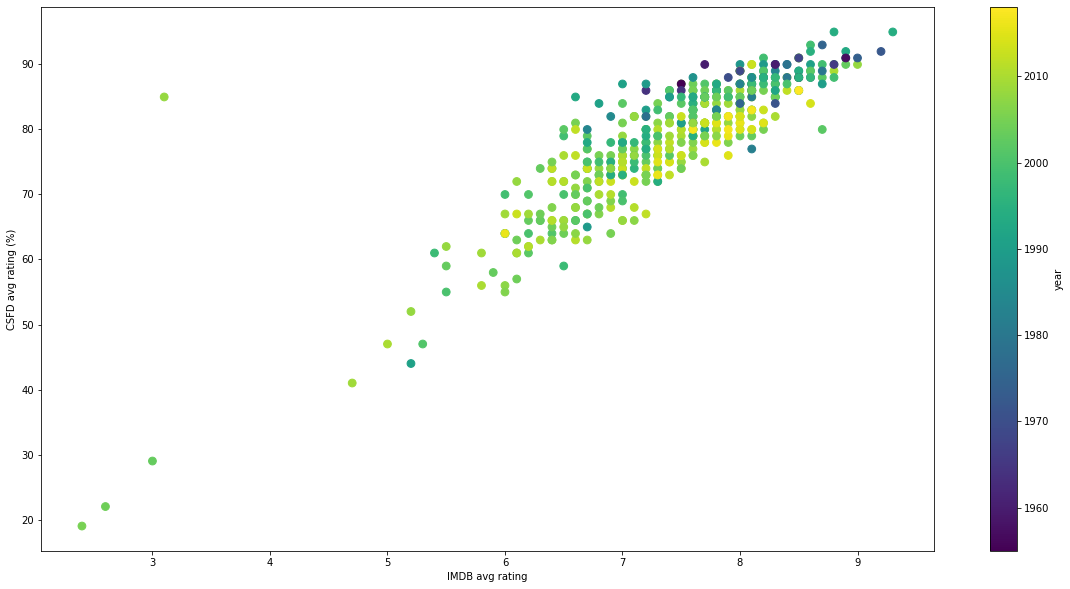

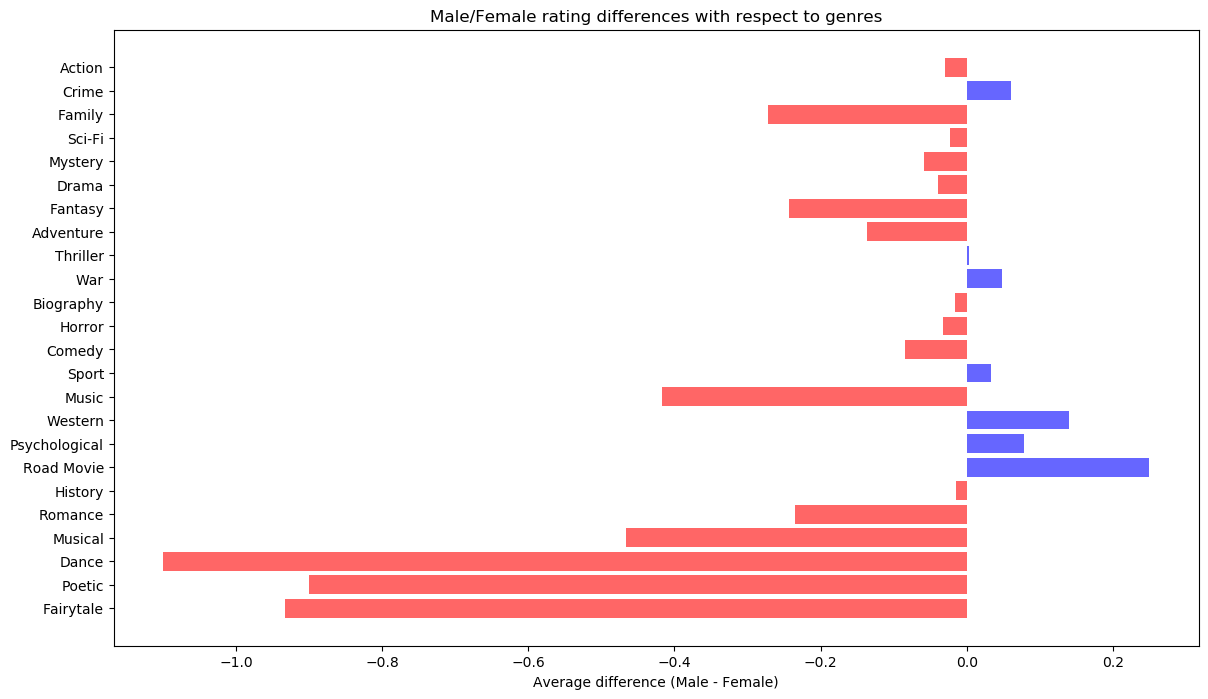

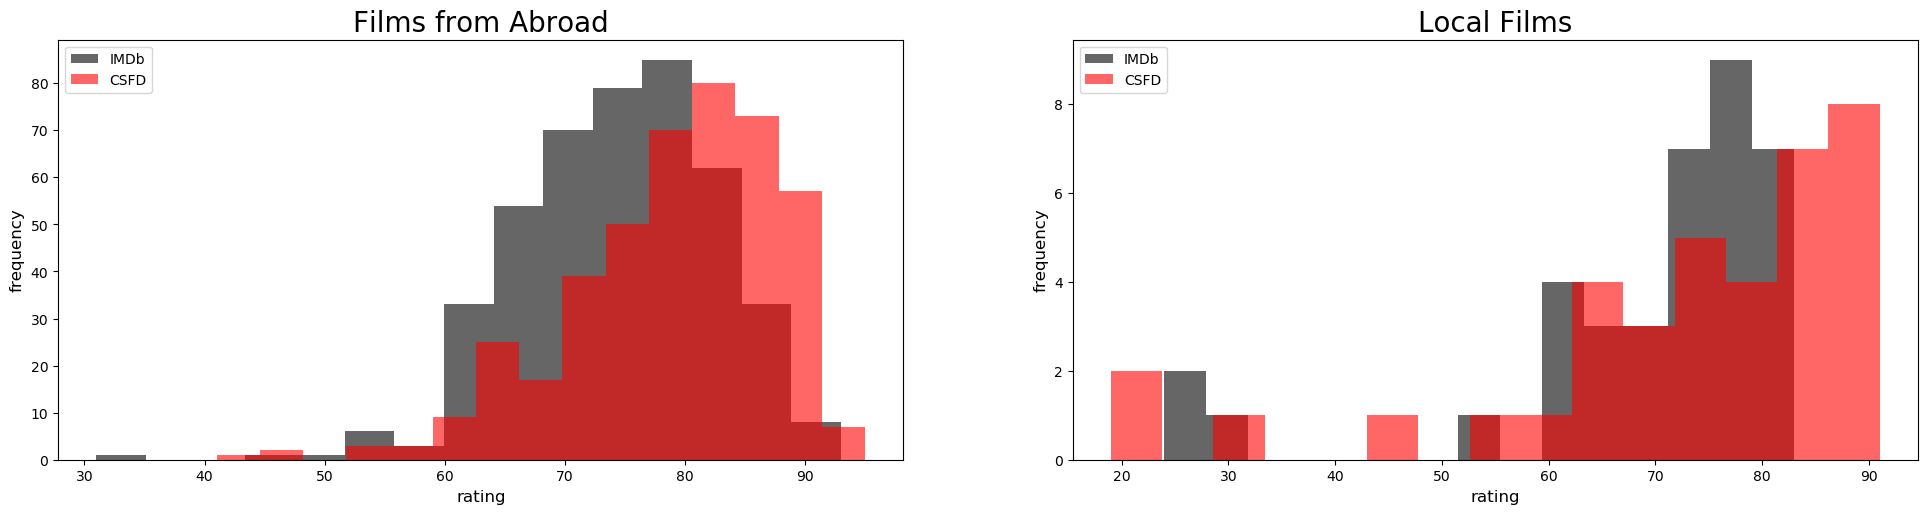

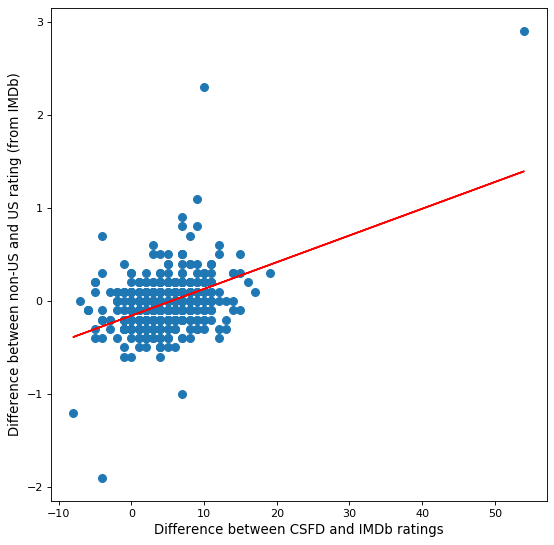

In [26]:
visualinst = Visualize(csfdinst.data)
visualinst.Plot(scat=True,bar=True,hist=True,reg=True)